In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
alphabets = list("ABCDEFGHIJ")

In [10]:
images = []
for alphabet in alphabets:
    for img in os.listdir(f"../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/{alphabet}"):
        image = cv2.imread(f"../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/{alphabet}/{img}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (100,100))
        image = image/255.0
        images.append(image.reshape((100,100,1)))

In [11]:
images = np.asarray(images)

In [12]:
images.shape

(30000, 100, 100, 1)

In [13]:
labels = []
for i in range(len(alphabets)):
    labels+=([i]*3000)

In [14]:
labels = np.asarray(labels)
labels.shape

(30000,)

In [17]:
from keras.utils import to_categorical
labels = to_categorical(labels, 10)

In [20]:
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

[0, 5, 6, 1, 4, 2, 8, 6, 1, 8, 2, 3, 5, 6, 7, 4, 4, 4, 1, 1, 4, 4, 5, 7, 0]


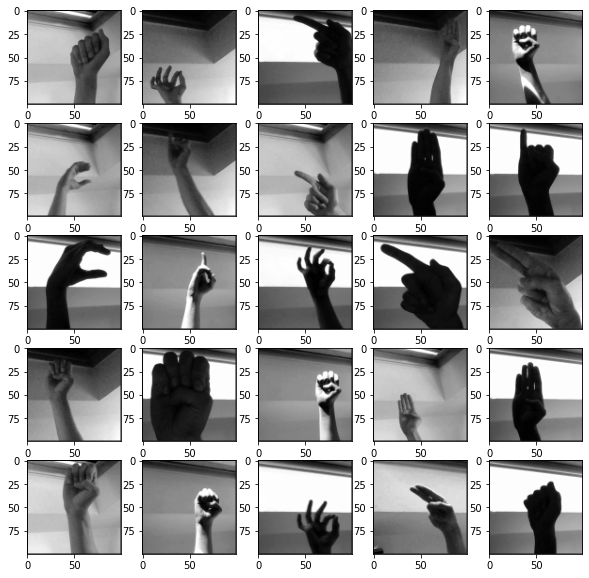

In [23]:
plt.figure(figsize = (10,10))
print([np.argmax(i) for i in labels[:25]])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i].reshape((100,100)), cmap = "gray")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24000, 100, 100, 1), (24000, 10), (6000, 100, 100, 1), (6000, 10))

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization

In [27]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(MaxPool2D())
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
375/375 [==============================] - 19s 51ms/step - loss: 0.6650 - accuracy: 0.7571 - val_loss: 0.1621 - val_accuracy: 0.9467
Epoch 2/5
375/375 [==============================] - 19s 50ms/step - loss: 0.0765 - accuracy: 0.9767 - val_loss: 0.0405 - val_accuracy: 0.9862
Epoch 3/5
375/375 [==============================] - 19s 50ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0425 - val_accuracy: 0.9858
Epoch 4/5
375/375 [==============================] - 19s 50ms/step - loss: 0.0224 - accuracy: 0.9945 - val_loss: 0.0304 - val_accuracy: 0.9895
Epoch 5/5
375/375 [==============================] - 19s 50ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0069 - val_accuracy: 0.9973


In [31]:
print(np.argmax(y_test[583]))
print(np.argmax(model.predict(X_test[583].reshape((1,100,100,1)))))

1
1


In [32]:
model_json = model.to_json()
with open("10_alpha_ASL_Model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("10_alpha_ASL_Model_weights.h5")